In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('insurance.csv')
df.head()    

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [3]:
df.shape

(1338, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [7]:
df=df.drop_duplicates()
df.shape

(1337, 7)

### Data Analysis

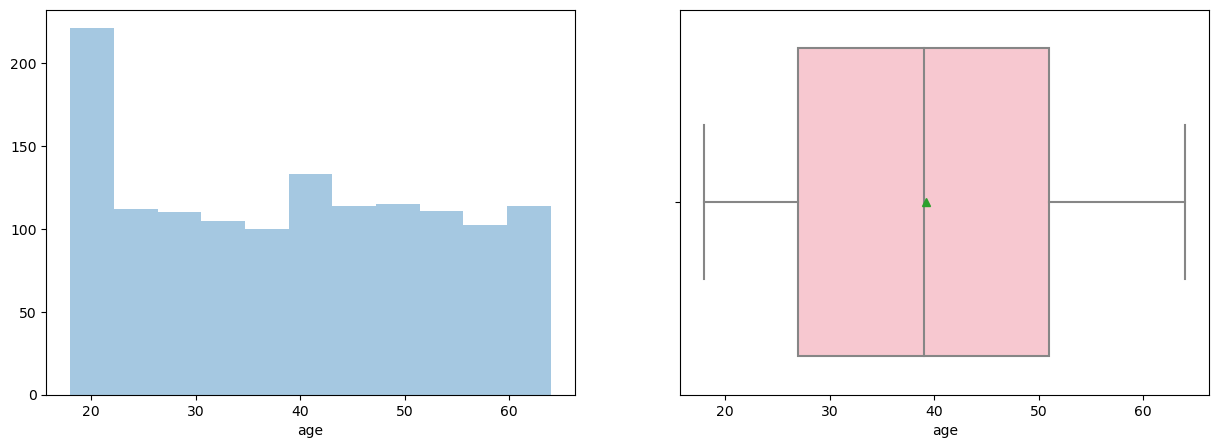

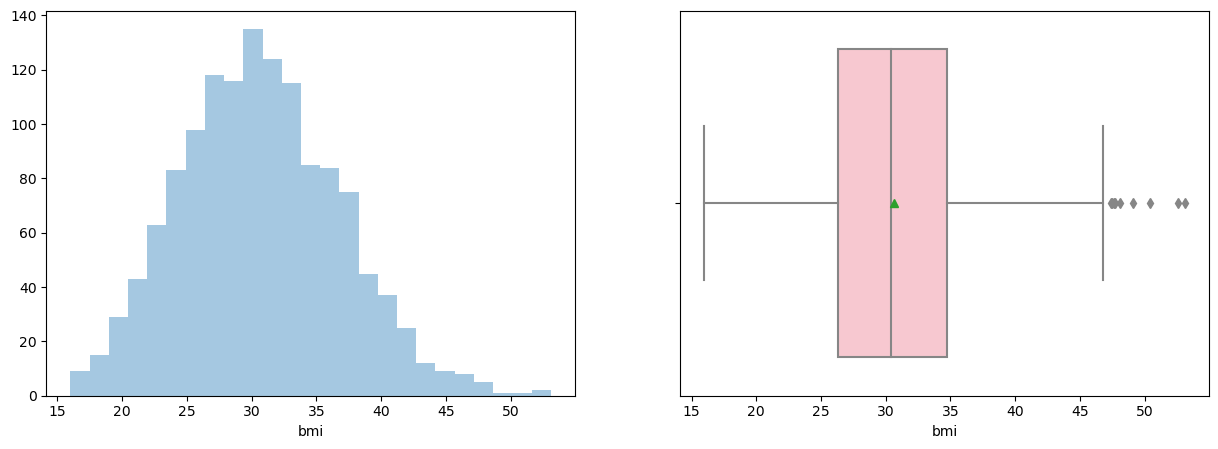

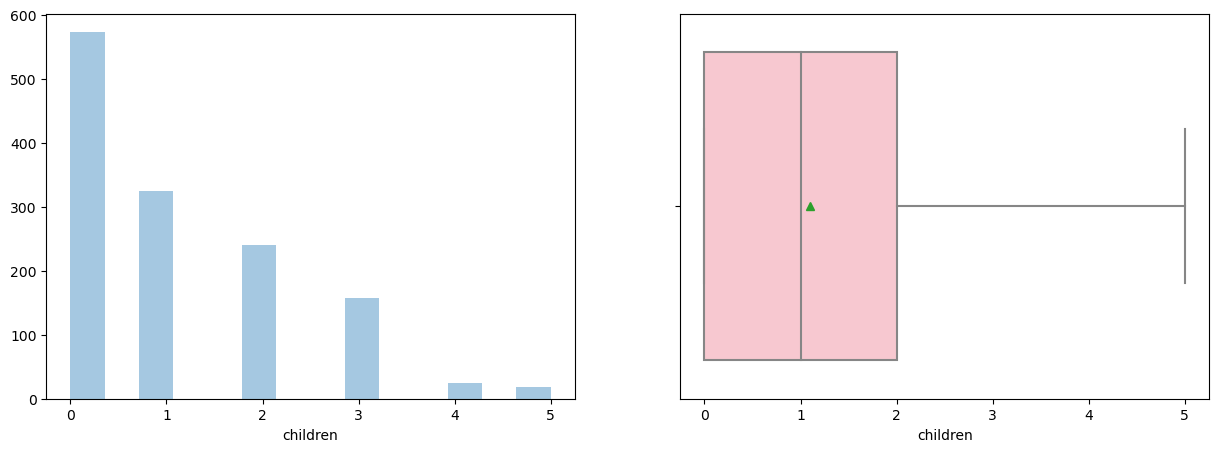

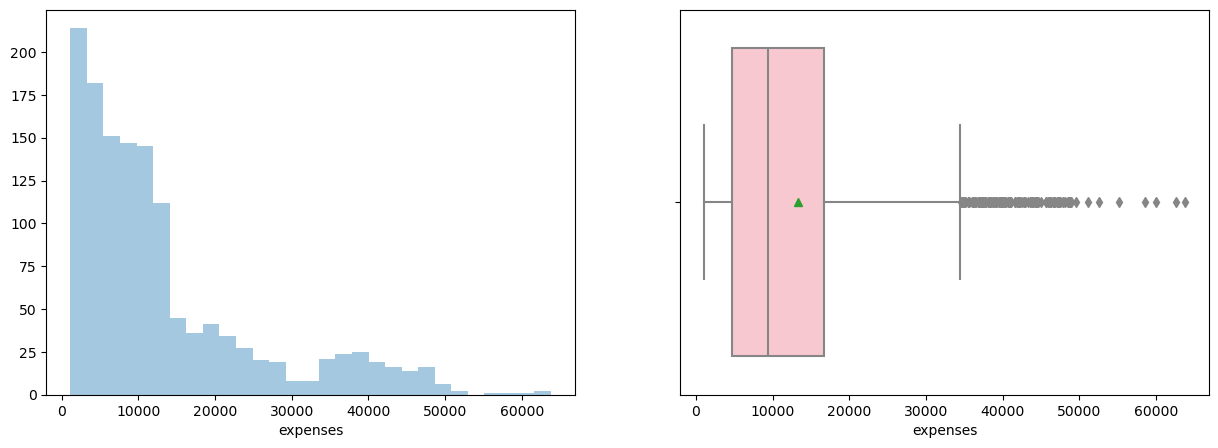

In [8]:
x_axis=['age','bmi','children','expenses']
for x in x_axis:
    fig , axes=plt.subplots(1,2, figsize=(15,5))
    sns.distplot(df[x],ax=axes[0],kde=False)
    sns.boxplot(df[x], ax=axes[1] , orient="h", showmeans=True, color="pink")

### Handling Categorical columns


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [10]:
df['sex']=df['sex'].map({'female':0,"male":1})


In [11]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [12]:
df['smoker']=df['smoker'].map({'no':0,"yes":1})


In [13]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [14]:
df['region']=df['region'].map({
    'southwest':0,
    "southeast":1,
    "northwest":2,
    "northeast":3
})


In [15]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1,18,1,33.8,1,0,1,1725.55
2,28,1,33.0,3,0,1,4449.46
3,33,1,22.7,0,0,2,21984.47
4,32,1,28.9,0,0,2,3866.86


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   int64  
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 83.6 KB


### Split the Data

In [17]:
X=df.drop('expenses',axis=1)
y=df['expenses']
X.shape,y.shape

((1337, 6), (1337,))

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.2,
                                              random_state=50)
X_train.shape , X_test.shape

((1069, 6), (268, 6))

### Model Training

In [19]:
# Linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred_lr=lr.predict(X_test)
score1=r2_score(y_test,y_pred_lr)
score1

0.8036721313820487

### Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor()

rf.fit(X_train,y_train)

RandomForestRegressor()

In [48]:
y_pred_rf = best_rf.predict(X_test)

In [49]:
score2=r2_score(y_test,y_pred_rf)
score2

0.9152087514857576

In [66]:
data={
    'age':19,
    'sex':0,
    'bmi':27.9,
    'children':0,
    'smoker':1,
    'region':1
}

new_df=pd.DataFrame(data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,1


In [67]:
pred=rf.predict(new_df)
np.round(pred[0],2)

17640.51

In [68]:
X_test.head()

,age,sex,bmi,children,smoker,region
1106,49,0,29.9,0,0,2
1268,20,0,33.3,0,0,0
287,63,0,26.2,0,0,2
232,19,0,17.8,0,0,0
849,55,1,32.8,0,0,2


In [69]:
y_test

1106     8988.16
1268     1880.49
287     14256.19
232      1727.79
849     10601.63
          ...   
495      1967.02
278     12928.79
1012    36580.28
203     37133.90
1018    12495.29
Name: expenses, Length: 268, dtype: float64

In [73]:
df[(df['age']==19) & (df['bmi']==27.9)]

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,0,16884.92
1195,19,0,27.9,3,0,2,18838.70


### SAVE  MODEL

In [75]:
import joblib
joblib.dump(rf,'rf_model')

['rf_model']